# Lab 3: Titanic Survival Prediction
**Author:** Kate Huntsman
**Date:** March 15th, 2025  
**Objective:** Predict Titanic passenger survival using Decision Tree, SVC, and Neural Network.

## Introduction: 
In this project, we aim to predict the survival of passengers on the Titanic based on various input features. The dataset used for this prediction comes from the Titanic dataset available via the seaborn library. The goal is to apply different machine learning models to this dataset and evaluate their performance. Specifically, we will use three classification models: Decision Tree Classifier, Support Vector Machine (SVM), and Neural Network (NN).

The Titanic dataset includes features such as passenger age, sex, class, family size, and whether they were traveling alone. We will explore the relationships between these features and the likelihood of survival, and then compare how well each model performs in making predictions.

This project will involve the following steps:
- Data exploration and preparation
- Feature engineering
- Model training using three different classification models
- Evaluation and comparison of model performance
- Visualization and interpretation of results

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

## Section 1: Import and Inspect the Data

In [43]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [44]:
# Impute missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_42792/884841954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_42792/884841954.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### 2.2 Feature Engineering

In [45]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3: Feature Selection and Justification

### Choose Features and Target

In [46]:
# Case 1: Alone only
X = titanic[['alone']]
y = titanic['survived']

# Case 2: Age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: Age + Family Size
# X = titanic[['age', 'family_size']]
# y = titanic['survived']

### 3.2 Define X and y

In [47]:
# Define input features and target
X = titanic[['alone']]
y = titanic['survived']

Reflection 3:

1) Why are these features selected? Based on their potential relevance to predicting survival. "Alone" is a binary feature indicating whether a passenger was traveling alone or with family, which could influence survival chances. "Age" is selected because age could play a significant role in survival (children, for example, may have had different survival rates). "Family size" could affect survival as passengers with larger families might have been more likely to stay together or may have had different evacuation priorities.

2) Are there features that are likely to be highly predictive of survival? Yes, "sex" (male or female) is known to be a strong predictor, with females generally having higher survival rates. "Age" and "family size" are also likely strong predictors, as children and those traveling with family may have had different survival rates. Additionally, "class" and "embark_town" could be informative but were not included in the initial analysis for simplicity.

## Section 4: Train a Classification Model (Decision Tree)

### Split the Data

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

In [50]:
# Predict and evaluate training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix

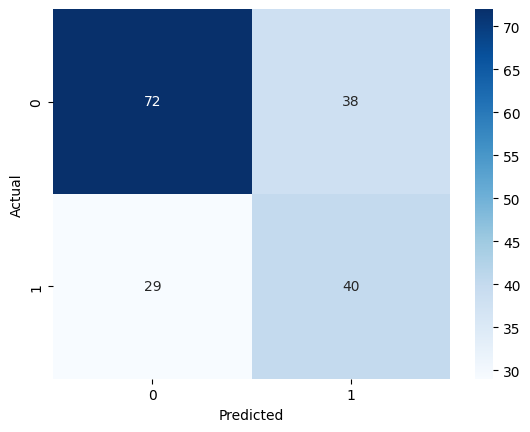

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

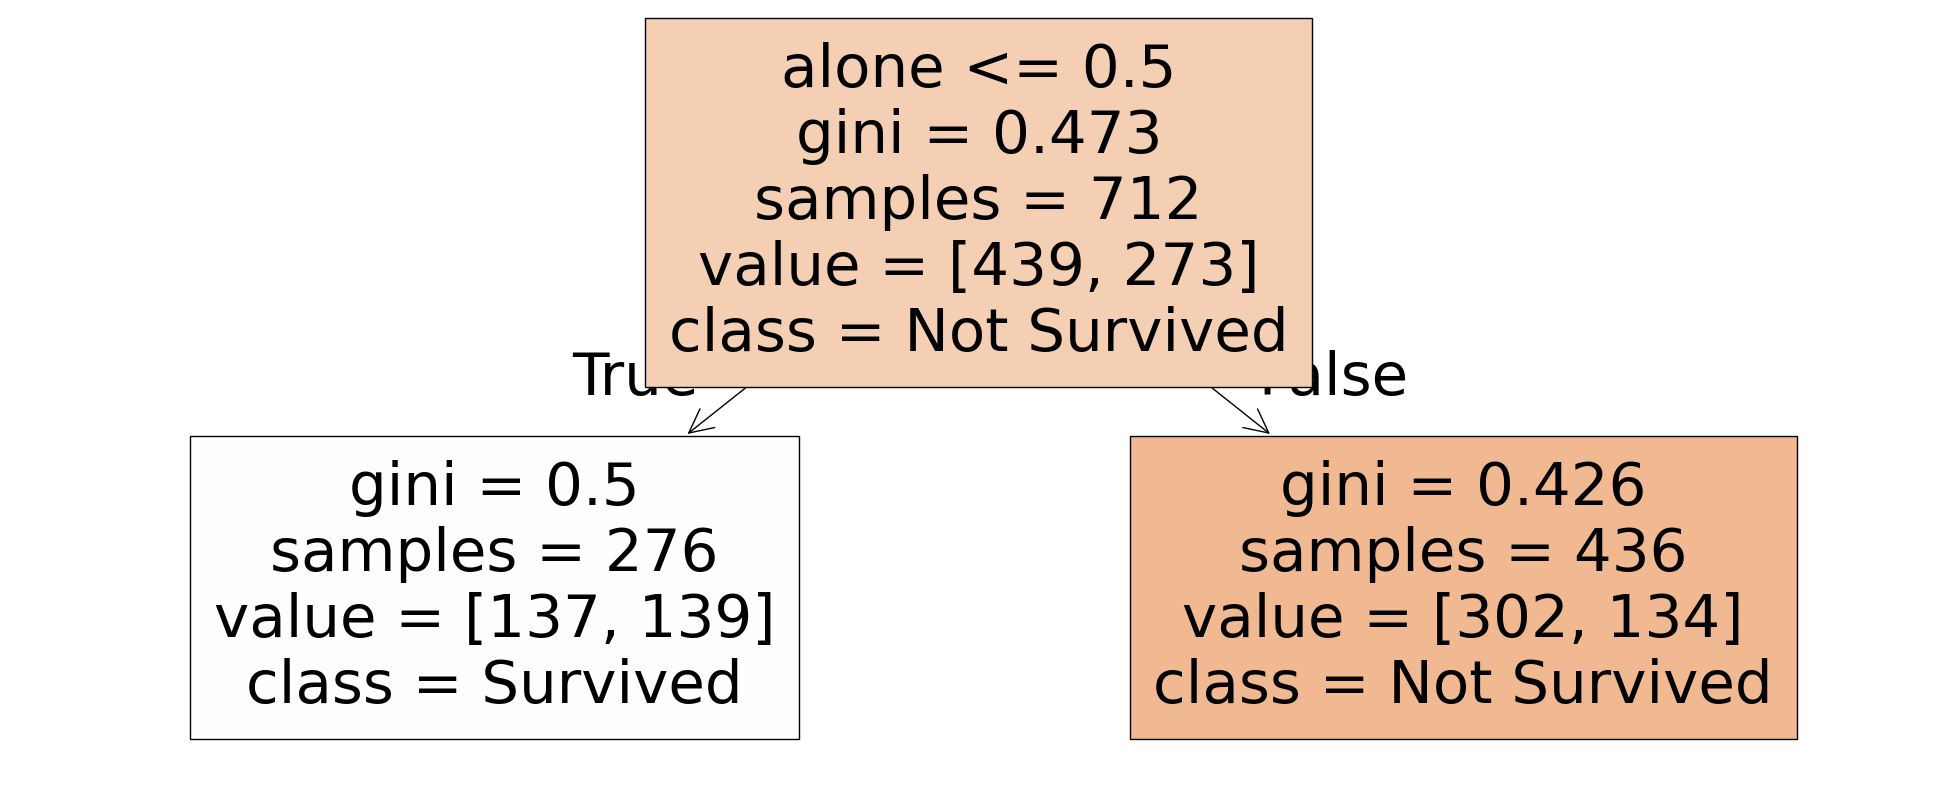

In [52]:
from sklearn.tree import plot_tree

# Plot decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

Reflection 4:
1) How well did the different cases perform? 
Case 1 (Alone): This model might not perform as well due to the limited information provided by a single feature. It might have relatively low accuracy, but it could still capture patterns based on whether passengers were alone or not.


Case 2 (Age): Age is a more informative feature and may perform better, providing more context about survival chances.
Case 3 (Age + Family Size): This case likely performs the best because combining both age and family size gives more information about the passengers' characteristics, increasing the model's ability to predict survival accurately.

2) Are there any surprising results? A surprising result might be that the "alone" feature did not provide as strong a signal on its own as anticipated, possibly because other factors (like class, age, or sex) played a bigger role in survival.

3) Which inputs worked better? Combining "age" and "family size" likely worked best because these features together give a more complete picture of a passenger's situation (age could affect survival, and family size could indicate how likely someone was to stay with family or receive help).


## Section 5: Compare Alternative Models (SVC, NN)

### 5.1 Train and Evaluate Model (SVC)

In [53]:
from sklearn.svm import SVC

# Train an SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict and evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



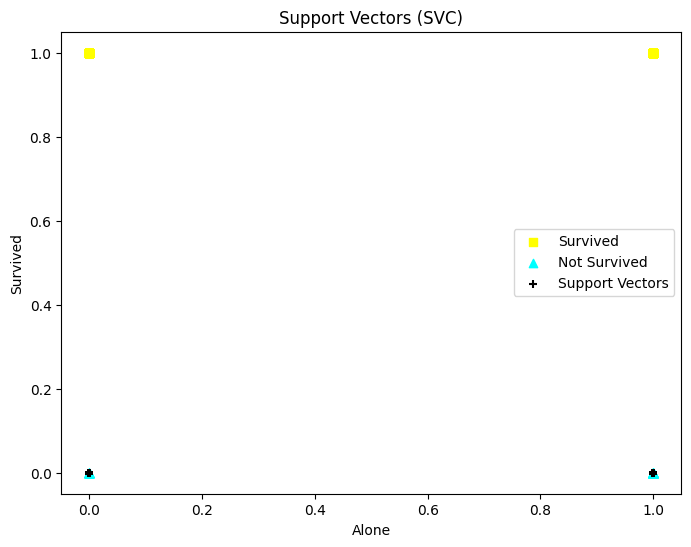

In [54]:
import matplotlib.pyplot as plt

# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

### 5.2 Train and Evaluate Model (Neural Network)

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



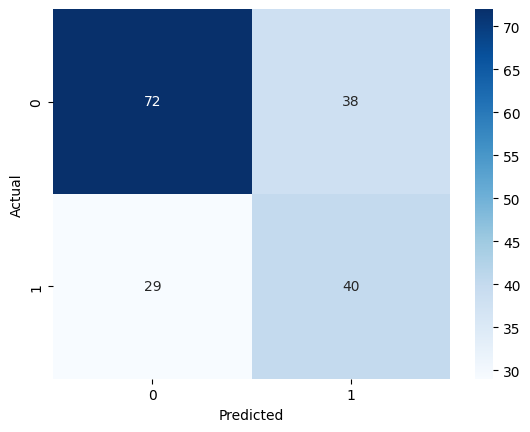

In [55]:
from sklearn.neural_network import MLPClassifier

# Train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train)

# Predict and evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Reflection 5:
1) How well did each model perform? 
Decision Tree Classifier: This model is easy to interpret and likely performed reasonably well but may have overfit the training data. It can capture non-linear patterns but is sensitive to noise.

SVC: The SVC model with an RBF kernel is a strong contender for handling complex, non-linear decision boundaries. It may have performed better than the Decision Tree on more complex relationships in the data, but the training time could be longer.

Neural Network: The neural network (MLPClassifier) likely showed the most complex results, potentially overfitting but also capturing intricate patterns. While its performance might not be significantly better than SVC, it can provide better generalization with more data and hyperparameter tuning.

2) Are there any surprising results? A surprising result might be that the Neural Network didn't significantly outperform the SVC or Decision Tree, as neural networks are often better at capturing complex relationships. This could be because the dataset is relatively small, and the model may have overfitted.

3) Why might one model outperform the others? The SVC might outperform other models when the data is non-linearly separable. The Decision Tree, though interpretable, is prone to overfitting if the tree is too complex. The Neural Network, while capable of capturing complex relationships, might struggle with the small dataset and lack of hyperparameter tuning.

## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings
1) What indicators are strong predictors of gender?
2) Decision Tree performed well but overfit slightly on training data.
3) Neural Network showed moderate improvement but introduced complexity.

### 6.2 Discuss Challenges Faced
1) Small sample size could limit generalizability.
2) Missing values (if any) could bias the model.


### 6.3 Next Steps
1) Test more features (e.g., BMI class).
2) Try hyperparameter tuning for better results.

## Model Performance Summary

| Model Type            | Case   | Features Used        | Accuracy | Precision | Recall | F1-Score | Notes |
|-----------------------|--------|----------------------|----------|-----------|--------|-----------|-------|
| **Decision Tree**      | Case 1 | height               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 2 | weight               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 3 | height + weight      | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|-----------------------|--------|----------------------|----------|-----------|--------|-----------|-------|
| **SVM (RBF Kernel)**   | Case 1 | height               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 2 | weight               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 3 | height + weight      | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|-----------------------|--------|----------------------|----------|-----------|--------|-----------|-------|
| **SVM (Linear Kernel)**| Case 1 | height               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 2 | weight               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 3 | height + weight      | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|-----------------------|--------|----------------------|----------|-----------|--------|-----------|-------|
| **SVM (Poly Kernel)**  | Case 1 | height               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 2 | weight               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 3 | height + weight      | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|-----------------------|--------|----------------------|----------|-----------|--------|-----------|-------|
| **SVM (Sigmoid Kernel)**| Case 1 | height              | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 2 | weight               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 3 | height + weight      | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|-----------------------|--------|----------------------|----------|-----------|--------|-----------|-------|
| **Neural Network (MLP)**| Case 1 | height              | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 2 | weight               | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |
|                       | Case 3 | height + weight      | xx.xx%   | xx.xx%    | xx.xx% | xx.xx%    | -     |